In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import re


Read in all metrics into a dataframe (per class)

In [16]:
import os
import json
import pandas as pd

files = os.listdir("/user/christoph.wald/u15287/insect_pest_detection/metrics_collected")

class_map = {
    "class0": "FungusGnats",
    "class1": "LeafMinerFlies",
    "class2": "Thrips",
    "class3": "Whiteflies"
}

rows = []

for file in files:
    f = os.path.join("/user/christoph.wald/u15287/insect_pest_detection/metrics_collected", file)
    with open(f, "r") as infile:
        data = json.load(infile)
        
        # extract train and eval directly
        match = pd.Series(file).str.extract(r"[A-Za-z]+(\d+)[A-Za-z]+(\d+)\.[A-Za-z]+")
        train, eval_ = match.iloc[0, 0], match.iloc[0, 1]

        row = {
            "train": train,
            "eval": eval_,
        }

        for cls, stats in data["per_class"].items():
            if f"class{cls}" in class_map:
                prefix = class_map[f"class{cls}"]
                precision = stats.get("precision")
                recall = stats.get("recall")

                # calculate F1 first
                if precision is not None and recall is not None and (precision + recall) > 0:
                    f1 = 2 * (precision * recall) / (precision + recall)
                else:
                    f1 = 0.0  # handle zero division

                # then round all
                if precision is not None:
                    row[f"{prefix}_precision"] = precision
                if recall is not None:
                    row[f"{prefix}_recall"] = recall
                row[f"{prefix}_F1"] = f1
               # raw counts per class
                row[f"{prefix}_TP"] = stats.get("TP", 0)
                row[f"{prefix}_FP"] = stats.get("FP", 0)
                row[f"{prefix}_FN"] = stats.get("FN", 0)

        rows.append(row)

df = pd.DataFrame(rows)
df


,train,eval,FungusGnats_precision,FungusGnats_recall,FungusGnats_F1,FungusGnats_TP,FungusGnats_FP,FungusGnats_FN,LeafMinerFlies_precision,LeafMinerFlies_recall,...,Whiteflies_F1,Whiteflies_TP,Whiteflies_FP,Whiteflies_FN,Thrips_precision,Thrips_recall,Thrips_F1,Thrips_TP,Thrips_FP,Thrips_FN
0,10,3,0.858186,0.892970,0.875233,1410,233,169,0.922414,0.934869,...,0.912548,2400,238,222,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,0.867598,0.825839,0.846204,1304,199,275,0.932732,0.903098,...,0.882901,2228,197,394,0.745148,0.749576,0.747355,883.0,302.0,295.0
2,1,2,0.885863,0.865104,0.875360,1366,176,213,0.931006,0.911041,...,0.893254,2251,167,371,0.789527,0.665535,0.722248,784.0,209.0,394.0
3,1,3,0.887413,0.803673,0.843470,1269,161,310,0.940135,0.885624,...,0.869388,2130,148,492,0.789200,0.645161,0.709949,760.0,203.0,418.0
4,2,3,0.854480,0.899937,0.876619,1421,242,158,0.918161,0.935663,...,0.902675,2328,208,294,0.679121,0.786927,0.729060,927.0,438.0,251.0
5,3,3,0.852252,0.898670,0.874846,1419,246,160,0.922717,0.938840,...,0.897461,2280,179,342,0.692425,0.768251,0.728370,905.0,402.0,273.0
6,3,4,0.878143,0.862571,0.870288,1362,189,217,0.933172,0.920572,...,0.852947,2033,112,589,0.772627,0.594228,0.671785,700.0,206.0,478.0
7,6,3,0.875510,0.815073,0.844211,1287,183,292,0.937965,0.900715,...,0.871461,2139,148,483,0.762821,0.707131,0.733921,833.0,259.0,345.0
8,6,4,0.890448,0.844205,0.866710,1333,164,246,0.941993,0.915806,...,0.845570,2004,114,618,0.817450,0.516978,0.633385,609.0,136.0,569.0
9,6,5,0.897644,0.772008,0.830099,1219,139,360,0.940978,0.886418,...,0.816901,1885,108,737,0.816438,0.505942,0.624738,596.0,134.0,582.0


In [17]:

for key in class_map:
    insect = class_map[key]
    print(insect)
    print(df[insect + "_FP"] - df[insect + "_TP"]*0.1 / 0.9)


FungusGnats
0     76.333333
1     54.111111
2     24.222222
3     20.000000
4     84.111111
5     88.333333
6     37.666667
7     40.000000
8     15.888889
9      3.555556
10    64.000000
11    34.777778
12    17.333333
13    86.000000
14    42.111111
dtype: float64
LeafMinerFlies
0    -31.777778
1    -44.333333
2    -42.444444
3    -52.888889
4    -25.888889
5    -32.333333
6    -45.777778
7    -51.000000
8    -57.111111
9    -54.000000
10   -36.555556
11   -47.555556
12   -56.000000
13   -26.000000
14   -46.222222
dtype: float64
Thrips
0            NaN
1     203.888889
2     121.888889
3     118.555556
4     335.000000
5     301.444444
6     128.222222
7     166.444444
8      68.333333
9      67.777778
10    241.333333
11    114.222222
12     98.111111
13    342.444444
14           NaN
dtype: float64
Whiteflies
0     -28.666667
1     -50.555556
2     -83.111111
3     -88.666667
4     -50.666667
5     -74.333333
6    -113.888889
7     -89.666667
8    -108.666667
9    -101.444444
10   

Calculate total Precision, Recall, and F1

In [18]:
# Map class indices to names
class_map = {
    0: "FungusGnats",
    1: "LeafMinerFlies",
    2: "Thrips",
    3: "Whiteflies"
}

def micro_f1_per_file_row(row, selected_classes):
    # Sum TP, FP, FN across selected classes
    TP_total = sum(row[f"{cls}_TP"] for cls in selected_classes)
    FP_total = sum(row[f"{cls}_FP"] for cls in selected_classes)
    FN_total = sum(row[f"{cls}_FN"] for cls in selected_classes)

    precision_micro = TP_total / (TP_total + FP_total) if (TP_total + FP_total) > 0 else 0.0
    recall_micro = TP_total / (TP_total + FN_total) if (TP_total + FN_total) > 0 else 0.0

    micro_f1 = 2 * (precision_micro * recall_micro) / (precision_micro + recall_micro) if (precision_micro + recall_micro) > 0 else 0.0

    return pd.Series({
        "micro_precision": precision_micro,
        "micro_recall": recall_micro,
        "micro_F1": micro_f1
    })

classes_to_use = [0, 1, 2, 3]
selected_classes = [class_map[i] for i in classes_to_use]

total_all = df[["train", "eval"]].copy()
total_all[["precision", "recall", "F1"]] = df.apply(
    lambda row: micro_f1_per_file_row(row, selected_classes), axis=1
)
total_all = total_all.drop([0,14])
total_all = total_all.sort_values(by="F1", ascending=False)

classes_to_use = [0, 1, 3]
selected_classes = [class_map[i] for i in classes_to_use]

total_wo_thrips = df[["train", "eval"]].copy()
total_wo_thrips[["precision", "recall", "F1"]] = df.apply(
    lambda row: micro_f1_per_file_row(row, selected_classes), axis=1
)
total_wo_thrips = total_wo_thrips.sort_values(by="F1", ascending=False)

total_all.round(2)

,train,eval,precision,recall,F1
10,7,3,0.87,0.87,0.87
13,8,3,0.85,0.88,0.87
4,2,3,0.85,0.88,0.87
5,3,3,0.86,0.87,0.87
2,1,2,0.90,0.84,0.87
1,1,1,0.88,0.84,0.86
11,7,4,0.90,0.81,0.85
7,6,3,0.89,0.81,0.85
3,1,3,0.90,0.79,0.84
6,3,4,0.90,0.79,0.84


In [19]:
total_wo_thrips.round(2)

,train,eval,precision,recall,F1
0,10,3,0.90,0.91,0.91
10,7,3,0.91,0.90,0.90
13,8,3,0.90,0.90,0.90
4,2,3,0.90,0.90,0.90
5,3,3,0.90,0.89,0.90
14,9,3,0.92,0.88,0.90
2,1,2,0.92,0.87,0.89
11,7,4,0.92,0.85,0.88
1,1,1,0.91,0.86,0.88
6,3,4,0.92,0.83,0.88


Find best metrics for all classes and overall

In [20]:
df = df.drop(df.filter(regex="TP|FP|FN").columns, axis=1)

def best_values_train_eval(df):
    """
    For each numeric column, returns a dataframe with:
    - class
    - metric
    - best_value
    - corresponding train
    - corresponding eval
    Sorted by metric.
    """
    records = []
    
    for col in df.select_dtypes(include='number').columns:
        max_val = df[col].max()
        best_row = df[df[col] == max_val].iloc[0]  # first row with max
        
        # Split column into class and metric
        if "_" in col:
            class_name, metric_name = col.rsplit("_", 1)
        else:
            class_name, metric_name = col, ""
        
        records.append({
            "class": class_name,
            "metric": metric_name,
            "best_value": max_val,
            "train": best_row["train"],
            "eval": best_row["eval"]
        })
        
    result_df = pd.DataFrame(records)
    
    # Sort by metric
    result_df = result_df.sort_values(by="metric").reset_index(drop=True)
    
    return result_df

# Usage
best_df = best_values_train_eval(df)
best_df


,class,metric,best_value,train,eval
0,FungusGnats,F1,0.876678,7,3
1,LeafMinerFlies,F1,0.935446,9,3
2,Whiteflies,F1,0.912548,10,3
3,Thrips,F1,0.747355,1,1
4,FungusGnats,precision,0.897644,6,5
5,LeafMinerFlies,precision,0.943299,7,5
6,Whiteflies,precision,0.947786,3,4
7,Thrips,precision,0.817450,6,4
8,FungusGnats,recall,0.900570,8,3
9,LeafMinerFlies,recall,0.938840,3,3


Save tables

In [9]:


best_df.round(2).to_csv("supervised_best.csv")
total_all.round(2).to_csv("supervised_total.csv")
total_wo_thrips.round(2).to_csv("supervised_total_wo_thrips.csv")

In [15]:
row_to_move = df.loc[[0]] 
df = df.drop(0)
df = pd.concat([df, row_to_move], ignore_index=True)
df

,train,eval,Fun_P,Fun_R,Fun_F1,Leaf_P,Leaf_R,Leaf_F1,Whi_P,Whi_R,Whi_F1,Tr_P,Tr_R,Tr_F1
0,1,2,0.885863,0.865104,0.875360,0.931006,0.911041,0.920915,0.930935,0.858505,0.893254,0.789527,0.665535,0.722248
1,1,3,0.887413,0.803673,0.843470,0.940135,0.885624,0.912065,0.935031,0.812357,0.869388,0.789200,0.645161,0.709949
2,2,3,0.854480,0.899937,0.876619,0.918161,0.935663,0.926829,0.917981,0.887872,0.902675,0.679121,0.786927,0.729060
3,3,3,0.852252,0.898670,0.874846,0.922717,0.938840,0.930709,0.927206,0.869565,0.897461,0.692425,0.768251,0.728370
4,3,4,0.878143,0.862571,0.870288,0.933172,0.920572,0.926829,0.947786,0.775362,0.852947,0.772627,0.594228,0.671785
5,6,3,0.875510,0.815073,0.844211,0.937965,0.900715,0.918963,0.935286,0.815789,0.871461,0.762821,0.707131,0.733921
6,6,4,0.890448,0.844205,0.866710,0.941993,0.915806,0.928715,0.946176,0.764302,0.845570,0.817450,0.516978,0.633385
7,6,5,0.897644,0.772008,0.830099,0.940978,0.886418,0.912883,0.945810,0.718917,0.816901,0.816438,0.505942,0.624738
8,7,3,0.864532,0.889170,0.876678,0.925926,0.933280,0.929589,0.926282,0.881770,0.903478,0.724556,0.761460,0.742550
9,7,4,0.879636,0.856238,0.867779,0.934853,0.911835,0.923201,0.944861,0.816934,0.876253,0.789700,0.624788,0.697630


In [11]:
df = df.rename(columns=lambda x: x
               .replace("FungusGnats", "Fun")
               .replace("LeafMinerFlies", "Leaf")
               .replace("Whiteflies", "Whi")
               .replace("Thrips", "Tr")
               .replace("precision", "P")
               .replace("recall", "R")
              )
df

,train,eval,Fun_P,Fun_R,Fun_F1,Leaf_P,Leaf_R,Leaf_F1,Whi_P,Whi_R,Whi_F1,Tr_P,Tr_R,Tr_F1
0,1,1,0.867598,0.825839,0.846204,0.932732,0.903098,0.917676,0.918763,0.849733,0.882901,0.745148,0.749576,0.747355
1,1,2,0.885863,0.865104,0.875360,0.931006,0.911041,0.920915,0.930935,0.858505,0.893254,0.789527,0.665535,0.722248
2,1,3,0.887413,0.803673,0.843470,0.940135,0.885624,0.912065,0.935031,0.812357,0.869388,0.789200,0.645161,0.709949
3,2,3,0.854480,0.899937,0.876619,0.918161,0.935663,0.926829,0.917981,0.887872,0.902675,0.679121,0.786927,0.729060
4,3,3,0.852252,0.898670,0.874846,0.922717,0.938840,0.930709,0.927206,0.869565,0.897461,0.692425,0.768251,0.728370
5,3,4,0.878143,0.862571,0.870288,0.933172,0.920572,0.926829,0.947786,0.775362,0.852947,0.772627,0.594228,0.671785
6,6,3,0.875510,0.815073,0.844211,0.937965,0.900715,0.918963,0.935286,0.815789,0.871461,0.762821,0.707131,0.733921
7,6,4,0.890448,0.844205,0.866710,0.941993,0.915806,0.928715,0.946176,0.764302,0.845570,0.817450,0.516978,0.633385
8,6,5,0.897644,0.772008,0.830099,0.940978,0.886418,0.912883,0.945810,0.718917,0.816901,0.816438,0.505942,0.624738
9,7,3,0.864532,0.889170,0.876678,0.925926,0.933280,0.929589,0.926282,0.881770,0.903478,0.724556,0.761460,0.742550


In [12]:
best_values = df.max()

# Row index of maximum value per column
best_indices = df.idxmax()

# Combine into a DataFrame
best_summary = pd.DataFrame({
    'Max_Value': best_values,
    'Row_Index': best_indices
})

print(best_summary)

        Max_Value  Row_Index
train           9         13
eval            5          8
Fun_P    0.897644          8
Fun_R     0.90057         12
Fun_F1   0.876678          9
Leaf_P   0.943299         11
Leaf_R    0.93884          4
Leaf_F1  0.935446         13
Whi_P    0.947786          5
Whi_R    0.915332         14
Whi_F1   0.912548         14
Tr_P      0.81745          7
Tr_R     0.791171         12
Tr_F1    0.747355          0


In [13]:
df.round(2).to_csv("supervised_eval.csv")

,train,eval,FungusGnats_precision,FungusGnats_recall,FungusGnats_F1,LeafMinerFlies_precision,LeafMinerFlies_recall,LeafMinerFlies_F1,Whiteflies_precision,Whiteflies_recall,Whiteflies_F1,Thrips_precision,Thrips_recall,Thrips_F1
0,10,3,0.858186,0.89297,0.875233,0.922414,0.934869,0.928600,0.909780,0.915332,0.912548,NaN,NaN,NaN
10,7,3,0.864532,0.88917,0.876678,0.925926,0.933280,0.929589,0.926282,0.881770,0.903478,0.724556,0.76146,0.74255


### Old stuff


In [79]:
def plot_recall_precision(df, class_names, extra_val, filename):
    """
    Plots side-by-side barplots for recall and precision with reference lines.
    
    Parameters:
        df (pd.DataFrame): DataFrame with 'recall' and 'precision' columns.
        class_names (list): List of class names (in the same order as df rows).
    """
    # Make sure df is aligned with class names
    df = df.copy()
    df["class"] = class_names
    extra_class = "fungus gnats"

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Recall bar plot
    axes[0].bar(df["class"], df["recall"], color="skyblue")
    axes[0].axhline(y=0.8, color="red", linestyle="dotted", linewidth=2)
    axes[0].set_title("Recall")
    axes[0].set_ylim(0, 1)
    

    # Precision bar plot
    axes[1].bar(extra_class, extra_val, color = "purple")
    axes[1].bar(df["class"], df["precision"], color="lightgreen")
    axes[1].axhline(y=0.9, color="red", linestyle="dotted", linewidth=2)
    axes[1].set_title("Precision")
    axes[1].set_ylim(0, 1)
    

    # Für Recall
    axes[0].set_xticklabels([f"{cls}\n{val:.2f}" for cls, val in zip(df["class"], df["recall"])])

    # Für Precision



    xticklabels = []
    for cls, val in zip(df["class"], df["precision"]):
        if cls == extra_class:
            xticklabels.append(f"{cls}\n{extra_val:.2f}")  # show extra value
        else:
            xticklabels.append(f"{cls}\n{val:.2f}")
    axes[1].set_xticklabels(xticklabels)

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

/tmp/ipykernel_1918331/1937441191.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([f"{cls}\n{val:.2f}" for cls, val in zip(df["class"], df["recall"])])
/tmp/ipykernel_1918331/1937441191.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(xticklabels)


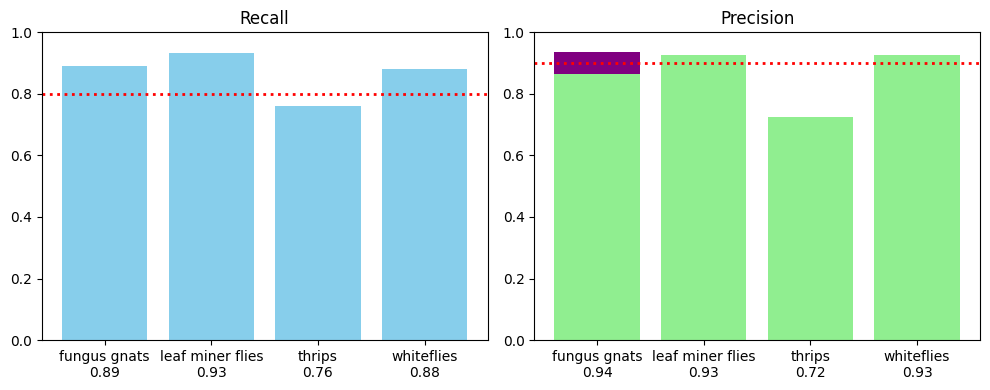

In [80]:
# Load JSON
with open("/user/christoph.wald/u15287/insect_pest_detection/metrics_collected/train7eval3.json", "r") as f:
    metrics = json.load(f)

# Extract per-class metrics
per_class = metrics["per_class"]

# Convert to DataFrame
df = pd.DataFrame(per_class).T  # .T to transpose so that rows = classes
df = df[["recall", "precision"]]  # keep only recall & precision

# Optional: convert index to int if class names are numeric
#df.index = df.index.astype(int)

# Sort by class index
df = df.sort_index()
class_names = ["fungus gnats", "leaf miner flies", "thrips", "whiteflies"]
extra_val = 0.935960591

# Now you can call your plotting function
plot_recall_precision(df, class_names, extra_val, filename = "train7eval3.png")

/tmp/ipykernel_1918331/1937441191.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([f"{cls}\n{val:.2f}" for cls, val in zip(df["class"], df["recall"])])
/tmp/ipykernel_1918331/1937441191.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(xticklabels)


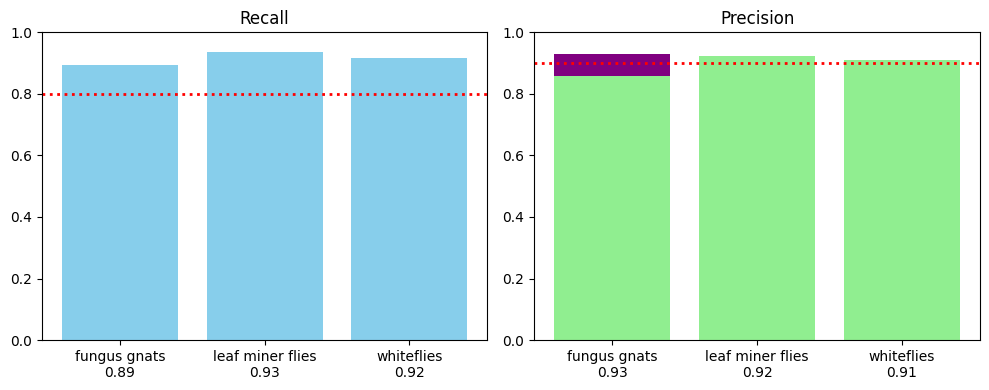

In [83]:
# Load JSON
with open("/user/christoph.wald/u15287/insect_pest_detection/metrics_collected/train10eval3.json", "r") as f:
    metrics = json.load(f)

# Extract per-class metrics
per_class = metrics["per_class"]

# Convert to DataFrame
df = pd.DataFrame(per_class).T  # .T to transpose so that rows = classes
df = df[["recall", "precision"]]  # keep only recall & precision

# Optional: convert index to int if class names are numeric
#df.index = df.index.astype(int)

# Sort by class index
df = df.sort_index()
class_names = ["fungus gnats", "leaf miner flies", "whiteflies"]
extra_val = 0.928788801

# Now you can call your plotting function
plot_recall_precision(df, class_names, extra_val, filename = "train10eval3.png")

In [11]:
import os

def sum_lines_in_files(folder_path, starts_with):
    total_lines = 0

    for filename in os.listdir(folder_path):
        if filename.startswith(starts_with):
            file_path = os.path.join(folder_path, filename)
            if os.path.isfile(file_path):
                with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
                    # count lines manually instead of using built-in sum
                    for _ in f:
                        total_lines += 1

    return total_lines


In [12]:
train_instances = []
class_codes = ["BRAIIM", "LIRIBO", "FRANOC", "TRIAVA"]
for code in class_codes:
    total = sum_lines_in_files("/user/christoph.wald/u15287/big-scratch/02_splitted_data/train_labeled/labels", code)
    train_instances.append(total)
test_instances = []
for code in class_codes:
    total = sum_lines_in_files("/user/christoph.wald/u15287/big-scratch/02_splitted_data/test_set/labels", code)
    test_instances.append(total)

FileNotFoundError: [Errno 2] No such file or directory: '/user/christoph.wald/u15287/big-scratch/02_splitted_data/train_labeled/labels'

In [13]:
instances = [i+j for i,j in zip(train_instances, test_instances)]
instances

NameError: name 'test_instances' is not defined

In [14]:
me_train = [160,528,314,160]
labeled_images = [1018, 664, 592,434]
me_test = [40,131,78,40]

In [15]:
used_images = [i + j for i, j in zip(me_train, me_test)]

used_images

[200, 659, 392, 200]

NameError: name 'instances' is not defined

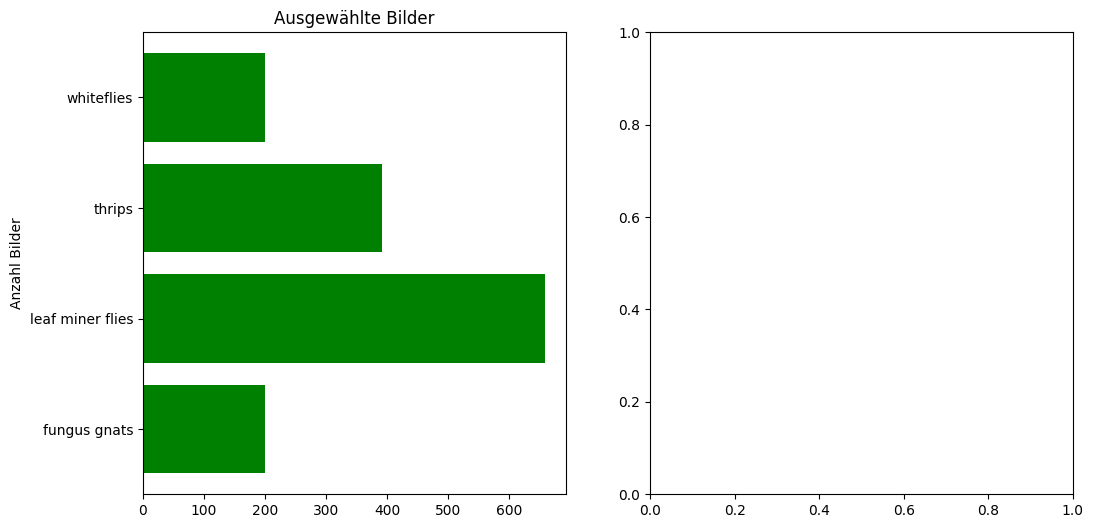

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


axes[0].barh(class_names, used_images, color="green")
axes[0].set_title("Ausgewählte Bilder")
axes[0].set_ylabel("Anzahl Bilder")

axes[1].barh(class_names, instances, color="lightgreen")
axes[1].set_title("Labels")
axes[1].set_ylabel("Anzahl Labels")

plt.tight_layout()
plt.savefig("anzahl_labels.png")
plt.show()


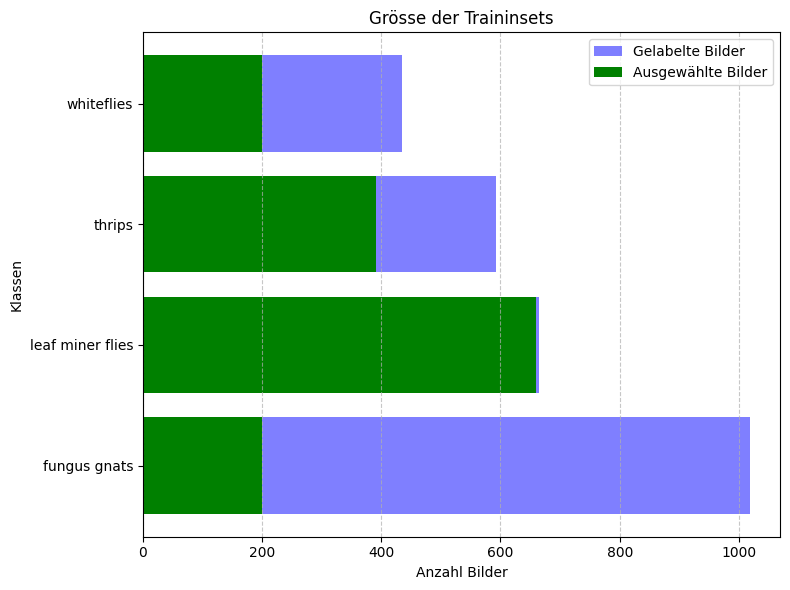

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

# Total
ax.barh(class_names, labeled_images, color="blue", alpha=0.5, label="Gelabelte Bilder")

# Plot me_train in the foreground
ax.barh(class_names, used_images, color="green", label="Ausgewählte Bilder")

ax.set_xlabel("Anzahl Bilder")
ax.set_ylabel("Klassen")
ax.set_title("Grösse der Traininsets")
ax.legend()
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.savefig("set_sizes")

plt.tight_layout()
plt.show()
